To upload **.csv** file from our local drive.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Covid-19.csv to Covid-19.csv


To import it into a **dataframe** (make sure the filename matches the name of the uploaded file).

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

import io
df = pd.read_csv(io.BytesIO(uploaded['Covid-19.csv']))
print(df.to_string())

         Country  Total_Cases  Total_Deaths  Total_Recovered  Active_Cases  Total_Cases_per_1M_population  Deaths_per_1M_population  Total_Tests  Tests per_1M_population  Population
0    Afghanistan       131586          5561            78521         47504                           3305                     140.0       647029                    16250    39816257
1        Armenia       226135          4540           217490          4105                          76168                    1529.0      1224512                   412449     2968881
2     Azerbaijan       336788          4980           330606          1202                          32915                     487.0      3821726                   373505    10232056
3        Bahrain       266919          1371           264125          1423                         151549                     778.0      5137699                  2917031     1761277
4     Bangladesh       989219         15792           856346        117081                

Scatter Plot **Populations** vs **Total_Deaths**.

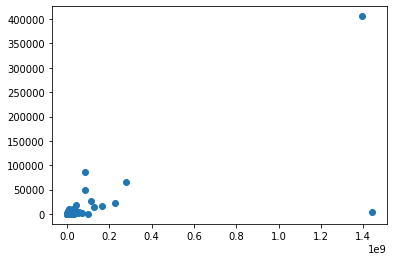

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['Population'],df['Total_Deaths'])
# print(df('Total_Recovered'))

To use **.sort_values()**,[link text](https://realpython.com/pandas-sort-python/) pass a single argument to the method containing the name of the column we want to sort by.

In [ ]:
print(df.sort_values('Country').to_string())

         Country  Total_Cases  Total_Deaths  Total_Recovered  Active_Cases  Total_Cases_per_1M_population  Deaths_per_1M_population  Total_Tests  Tests per_1M_population  Population
0    Afghanistan       131586          5561            78521         47504                           3305                     140.0       647029                    16250    39816257
1        Armenia       226135          4540           217490          4105                          76168                    1529.0      1224512                   412449     2968881
2     Azerbaijan       336788          4980           330606          1202                          32915                     487.0      3821726                   373505    10232056
3        Bahrain       266919          1371           264125          1423                         151549                     778.0      5137699                  2917031     1761277
4     Bangladesh       989219         15792           856346        117081                

***ONE HOT ENCODING::*** We use **ONE HOT ENCODING** method because **ML Model** are good with handling the numeric data. So, Create **'Country'** column to **dummie** variable. Because **'Country'** Column is a **Nominal Categorical Variable**.  For that use **.get_dummies()** and pass a single column **'Country'**.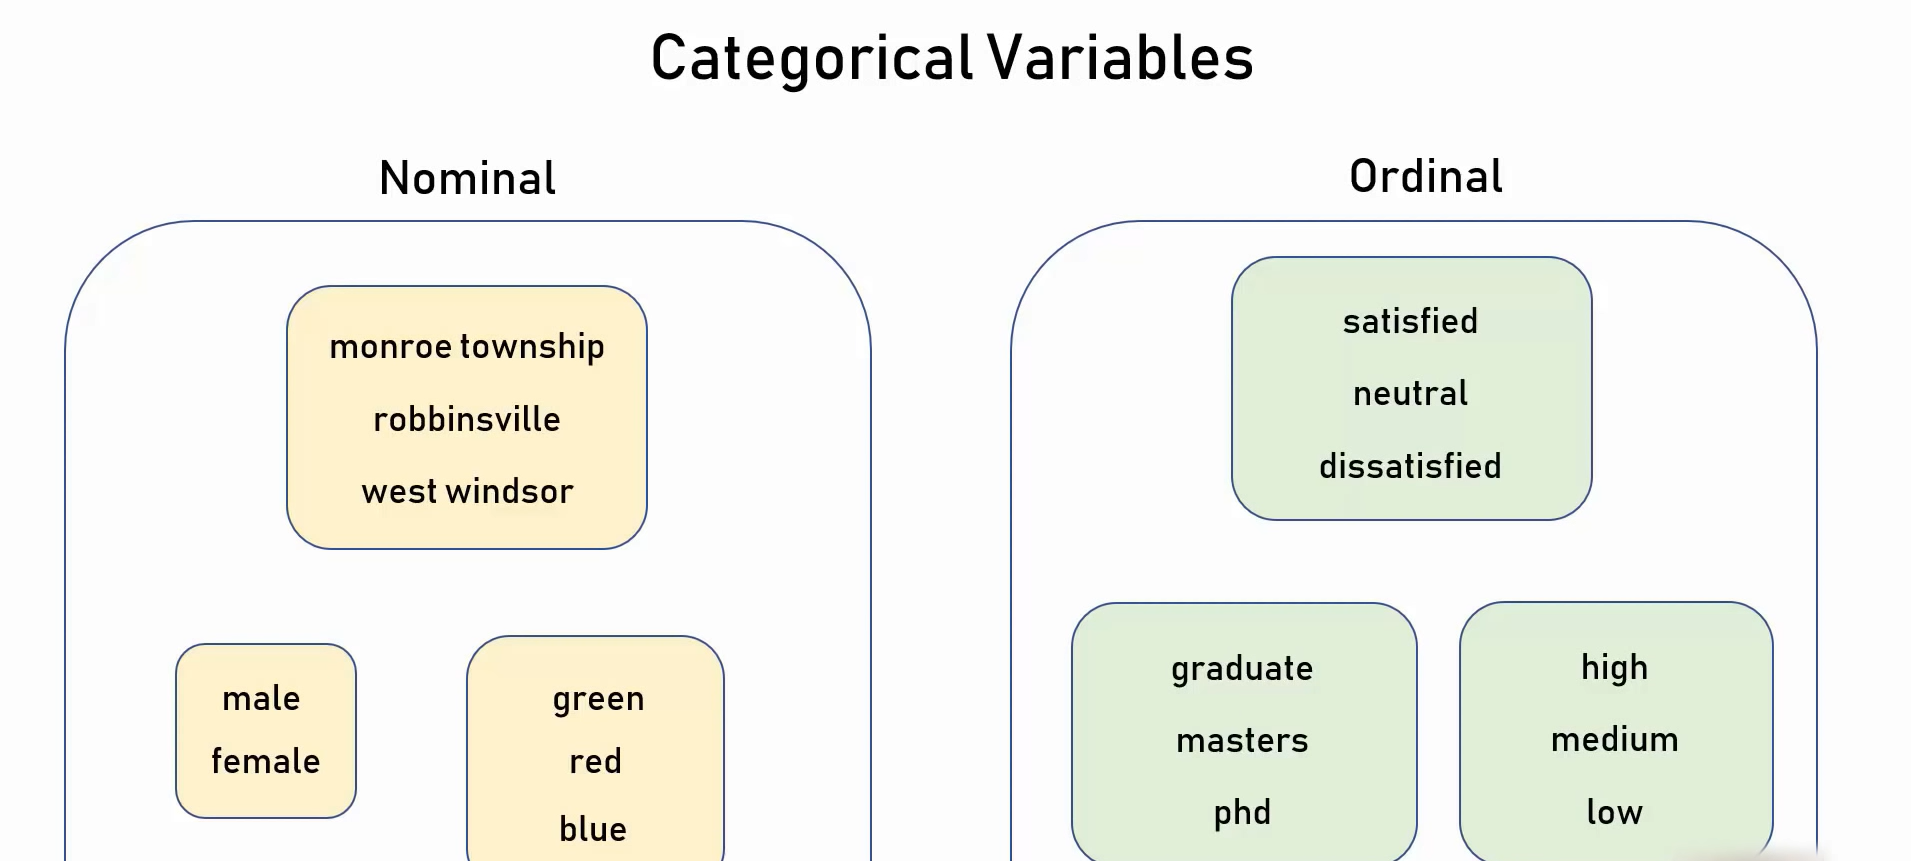

In [ ]:
dummies=pd.get_dummies(df.Country)
print(dummies.to_string())

    Afghanistan  Armenia  Azerbaijan  Bahrain  Bangladesh  Bhutan  Brunei  Cambodia  China  Cyprus  Georgia  Hong Kong  India  Indonesia  Iran  Iraq  Israel  Japan  Jordan  Kazakhstan  Kuwait  Kyrgyzstan  Laos  Lebanon  Macao  Malaysia  Maldives  Mongolia  Myanmar  Nepal  Oman  Pakistan  Palestine  Philippines  Qatar  Saudi Arabia  Singapore  South Korea  Sri Lanka  Syria  Taiwan  Tajikistan  Thailand  Timor-Leste  Turkey  UAE  Uzbekistan  Vietnam  Yemen
0             1        0           0        0           0       0       0         0      0       0        0          0      0          0     0     0       0      0       0           0       0           0     0        0      0         0         0         0        0      0     0         0          0            0      0             0          0            0          0      0       0           0         0            0       0    0           0        0      0
1             0        1           0        0           0       0       0         

Concatination to **orginal data set + Dummie data set**.

In [ ]:
marged = pd.concat([df,dummies],axis='columns')
print(marged.to_string())

         Country  Total_Cases  Total_Deaths  Total_Recovered  Active_Cases  Total_Cases_per_1M_population  Deaths_per_1M_population  Total_Tests  Tests per_1M_population  Population  Afghanistan  Armenia  Azerbaijan  Bahrain  Bangladesh  Bhutan  Brunei  Cambodia  China  Cyprus  Georgia  Hong Kong  India  Indonesia  Iran  Iraq  Israel  Japan  Jordan  Kazakhstan  Kuwait  Kyrgyzstan  Laos  Lebanon  Macao  Malaysia  Maldives  Mongolia  Myanmar  Nepal  Oman  Pakistan  Palestine  Philippines  Qatar  Saudi Arabia  Singapore  South Korea  Sri Lanka  Syria  Taiwan  Tajikistan  Thailand  Timor-Leste  Turkey  UAE  Uzbekistan  Vietnam  Yemen
0    Afghanistan       131586          5561            78521         47504                           3305                     140.0       647029                    16250    39816257            1        0           0        0           0       0       0         0      0       0        0          0      0          0     0     0       0      0       0           0

Drop **'Country'** column from the **marged** data frame.

In [ ]:
final=marged.drop(['Country'],axis='columns')
print(final.to_string())

    Total_Cases  Total_Deaths  Total_Recovered  Active_Cases  Total_Cases_per_1M_population  Deaths_per_1M_population  Total_Tests  Tests per_1M_population  Population  Afghanistan  Armenia  Azerbaijan  Bahrain  Bangladesh  Bhutan  Brunei  Cambodia  China  Cyprus  Georgia  Hong Kong  India  Indonesia  Iran  Iraq  Israel  Japan  Jordan  Kazakhstan  Kuwait  Kyrgyzstan  Laos  Lebanon  Macao  Malaysia  Maldives  Mongolia  Myanmar  Nepal  Oman  Pakistan  Palestine  Philippines  Qatar  Saudi Arabia  Singapore  South Korea  Sri Lanka  Syria  Taiwan  Tajikistan  Thailand  Timor-Leste  Turkey  UAE  Uzbekistan  Vietnam  Yemen
0        131586          5561            78521         47504                           3305                     140.0       647029                    16250    39816257            1        0           0        0           0       0       0         0      0       0        0          0      0          0     0     0       0      0       0           0       0           0     0  

Make Linear Regression Model.

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['Population','Total_Tests','Total_Cases','Total_Recovered','Active_Cases']],df.Total_Deaths)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the O/P:

In [ ]:
Populations= int(input("Enter Total Population of The Country or Socity: "))
Total_Testss= int(input("Enter How Much Total People Tests for COVID-19: "))
Total_Cases=int(input("Enter How Much Total Case Still Have: "))
Total_Recovereds=int(input("Enter Total How Much People Recovered Till Date: "))
Active_Casess=int(input("Enter Current Active COVID-19 Cases: "))

Death = reg.predict([[Populations,Total_Testss,Total_Cases,Total_Recovereds,Active_Casess]])

print("Please Be Careful...")
print(f"{Death} People May DIE From Your Information!")

Enter Total Population of The Country or Socity: 1000000
Enter How Much Total People Tests for COVID-19: 20000
Enter How Much Total Case Still Have: 15000
Enter Total How Much People Recovered Till Date: 90
Enter Current Active COVID-19 Cases: 6000
Please Be Careful...
[8910.] People May DIE From Your Information!
